In [0]:
import numpy as np 
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import math 
import os
warnings.filterwarnings('ignore')

In [0]:
# Loading the listing
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,MaxPooling2D,Flatten

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/drive')
import os
os.chdir('/drive/My Drive/')

Mounted at /drive


In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [0]:
os.listdir()

['HALL TICKECT- CDS.pdf',
 'my-resume_f6c67f95728cd28444b98862cc54445b.pdf',
 'GATE2019.pdf',
 'MAC PPT (1).gslides',
 'B.TECH',
 'Res',
 'photos',
 'Classroom',
 'EAadhaar_xxxxxxxx5119_04072019233456_098712.pdf',
 'What do A Data scientist do ?.gslides',
 'Data science',
 'Colab Notebooks',
 'Untitled spreadsheet.gsheet',
 'Gary Pauly Trade Data CY2017-1.gsheet',
 'Paytm_Wallet_Txn_History_Csv_Nov2019_8555841539.csv',
 'DATA SCIENTIST.gdoc',
 'my-resume_f6c67f95728cd28444b98862cc54445b.gdoc',
 'Untitled document.gdoc',
 'NAVEEN RESUME.docx',
 'mnist_data',
 'neural_class',
 'numberclass_nn',
 'VISHNU V Data Analyst resume.docx',
 'VISHNU V Data Analyst resume.gdoc',
 'Doc Resume.docx',
 'venkatesh.ipynb',
 'hackathon_images_train.csv',
 'hackathon_images_test.csv']

In [0]:
data_train=pd.read_csv('hackathon_images_train.csv')
data_test=pd.read_csv('hackathon_images_test.csv')

In [0]:
data_train.head(3)
data_test.head(3)

,Labels,pixels0,pixels1,pixels2,pixels3,pixels4,pixels5,pixels6,pixels7,pixels8,pixels9,pixels10,pixels11,pixels12,pixels13,pixels14,pixels15,pixels16,pixels17,pixels18,pixels19,pixels20,pixels21,pixels22,pixels23,pixels24,pixels25,pixels26,pixels27,pixels28,pixels29,pixels30,pixels31,pixels32,pixels33,pixels34,pixels35,pixels36,pixels37,pixels38,...,pixels9960,pixels9961,pixels9962,pixels9963,pixels9964,pixels9965,pixels9966,pixels9967,pixels9968,pixels9969,pixels9970,pixels9971,pixels9972,pixels9973,pixels9974,pixels9975,pixels9976,pixels9977,pixels9978,pixels9979,pixels9980,pixels9981,pixels9982,pixels9983,pixels9984,pixels9985,pixels9986,pixels9987,pixels9988,pixels9989,pixels9990,pixels9991,pixels9992,pixels9993,pixels9994,pixels9995,pixels9996,pixels9997,pixels9998,pixels9999
0,Faces_easy,84.0,83.0,82.0,80.0,77.0,76.0,71.0,71.0,72.0,73.0,73.0,65.0,65.0,62.0,63.0,68.0,65.0,65.0,72.0,77.0,86.0,85.0,88.0,84.0,87.0,82.0,79.0,62.0,80.0,80.0,83.0,84.0,82.0,87.0,91.0,87.0,85.0,85.0,89.0,...,189.0,185.0,193.0,194.0,195.0,197.0,194.0,190.0,188.0,185.0,184.0,186.0,186.0,185.0,187.0,188.0,184.0,187.0,183.0,184.0,188.0,192.0,193.0,202.0,206.0,207.0,203.0,228.0,226.0,226.0,225.0,213.0,221.0,220.0,219.0,221.0,222.0,222.0,222.0,223.0
1,airplanes,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,254.0,198.0,197.0,197.0,195.0,195.0,195.0,195.0,196.0,196.0,195.0,195.0,195.0,195.0,195.0,196.0,196.0,195.0,194.0,195.0,195.0,195.0,196.0,197.0,196.0,195.0,197.0,198.0,198.0,...,179.0,174.0,192.0,154.0,171.0,200.0,186.0,194.0,206.0,209.0,211.0,168.0,181.0,205.0,186.0,200.0,175.0,175.0,171.0,204.0,208.0,179.0,179.0,180.0,189.0,163.0,173.0,196.0,190.0,178.0,179.0,254.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
2,Motorbikes,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,15.0,16.0,19.0,17.0,16.0,16.0,18.0,12.0,25.0,20.0,17.0,20.0,18.0,16.0,51.0,28.0,23.0,12.0,16.0,57.0,22.0,16.0,10.0,17.0,20.0,25.0,26.0,223.0,254.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0


,Labels,pixels0,pixels1,pixels2,pixels3,pixels4,pixels5,pixels6,pixels7,pixels8,pixels9,pixels10,pixels11,pixels12,pixels13,pixels14,pixels15,pixels16,pixels17,pixels18,pixels19,pixels20,pixels21,pixels22,pixels23,pixels24,pixels25,pixels26,pixels27,pixels28,pixels29,pixels30,pixels31,pixels32,pixels33,pixels34,pixels35,pixels36,pixels37,pixels38,...,pixels9960,pixels9961,pixels9962,pixels9963,pixels9964,pixels9965,pixels9966,pixels9967,pixels9968,pixels9969,pixels9970,pixels9971,pixels9972,pixels9973,pixels9974,pixels9975,pixels9976,pixels9977,pixels9978,pixels9979,pixels9980,pixels9981,pixels9982,pixels9983,pixels9984,pixels9985,pixels9986,pixels9987,pixels9988,pixels9989,pixels9990,pixels9991,pixels9992,pixels9993,pixels9994,pixels9995,pixels9996,pixels9997,pixels9998,pixels9999
0,Leopards,2.0,4.0,2.0,0.0,3.0,3.0,5.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,0.0,1.0,1.0,0.0,3.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,...,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,4.0,4.0,2.0,2.0,3.0,6.0,0.0,5.0,1.0,5.0
1,bonsai,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,116.0,192.0,223.0,161.0,143.0,135.0,70.0,195.0,153.0,146.0,171.0,242.0,81.0,161.0,89.0,150.0,201.0,242.0,93.0,153.0,156.0,124.0,246.0,136.0,205.0,252.0,251.0,251.0,253.0,253.0,253.0,254.0,255.0,255.0,255.0,254.0,255.0,255.0,255.0,141.0
2,Faces_easy,153.0,152.0,153.0,154.0,155.0,153.0,159.0,160.0,157.0,157.0,157.0,157.0,157.0,157.0,158.0,159.0,158.0,163.0,160.0,160.0,162.0,161.0,162.0,159.0,161.0,162.0,164.0,164.0,163.0,159.0,161.0,164.0,166.0,167.0,162.0,162.0,162.0,165.0,164.0,...,215.0,213.0,207.0,210.0,110.0,78.0,85.0,86.0,78.0,82.0,83.0,88.0,75.0,66.0,62.0,61.0,70.0,71.0,87.0,78.0,77.0,74.0,61.0,62.0,67.0,67.0,65.0,69.0,74.0,71.0,73.0,69.0,69.0,80.0,78.0,76.0,75.0,75.0,73.0,72.0


In [0]:
# Shape of the dataset
data_train.shape,data_test.shape

((1671, 10001), (1118, 10001))

In [0]:
train=data_train.drop('Labels',axis=1)
train.head()

,pixels0,pixels1,pixels2,pixels3,pixels4,pixels5,pixels6,pixels7,pixels8,pixels9,pixels10,pixels11,pixels12,pixels13,pixels14,pixels15,pixels16,pixels17,pixels18,pixels19,pixels20,pixels21,pixels22,pixels23,pixels24,pixels25,pixels26,pixels27,pixels28,pixels29,pixels30,pixels31,pixels32,pixels33,pixels34,pixels35,pixels36,pixels37,pixels38,pixels39,...,pixels9960,pixels9961,pixels9962,pixels9963,pixels9964,pixels9965,pixels9966,pixels9967,pixels9968,pixels9969,pixels9970,pixels9971,pixels9972,pixels9973,pixels9974,pixels9975,pixels9976,pixels9977,pixels9978,pixels9979,pixels9980,pixels9981,pixels9982,pixels9983,pixels9984,pixels9985,pixels9986,pixels9987,pixels9988,pixels9989,pixels9990,pixels9991,pixels9992,pixels9993,pixels9994,pixels9995,pixels9996,pixels9997,pixels9998,pixels9999
0,84.0,83.0,82.0,80.0,77.0,76.0,71.0,71.0,72.0,73.0,73.0,65.0,65.0,62.0,63.0,68.0,65.0,65.0,72.0,77.0,86.0,85.0,88.0,84.0,87.0,82.0,79.0,62.0,80.0,80.0,83.0,84.0,82.0,87.0,91.0,87.0,85.0,85.0,89.0,88.0,...,189.0,185.0,193.0,194.0,195.0,197.0,194.0,190.0,188.0,185.0,184.0,186.0,186.0,185.0,187.0,188.0,184.0,187.0,183.0,184.0,188.0,192.0,193.0,202.0,206.0,207.0,203.0,228.0,226.0,226.0,225.0,213.0,221.0,220.0,219.0,221.0,222.0,222.0,222.0,223.0
1,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,254.0,198.0,197.0,197.0,195.0,195.0,195.0,195.0,196.0,196.0,195.0,195.0,195.0,195.0,195.0,196.0,196.0,195.0,194.0,195.0,195.0,195.0,196.0,197.0,196.0,195.0,197.0,198.0,198.0,196.0,...,179.0,174.0,192.0,154.0,171.0,200.0,186.0,194.0,206.0,209.0,211.0,168.0,181.0,205.0,186.0,200.0,175.0,175.0,171.0,204.0,208.0,179.0,179.0,180.0,189.0,163.0,173.0,196.0,190.0,178.0,179.0,254.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
2,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,15.0,16.0,19.0,17.0,16.0,16.0,18.0,12.0,25.0,20.0,17.0,20.0,18.0,16.0,51.0,28.0,23.0,12.0,16.0,57.0,22.0,16.0,10.0,17.0,20.0,25.0,26.0,223.0,254.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
3,2.0,0.0,2.0,1.0,0.0,2.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,2.0,6.0,2.0,3.0,0.0,2.0,2.0,1.0,...,18.0,24.0,24.0,19.0,24.0,15.0,20.0,16.0,22.0,16.0,25.0,18.0,20.0,25.0,26.0,21.0,22.0,20.0,23.0,18.0,20.0,21.0,17.0,22.0,16.0,22.0,12.0,14.0,19.0,18.0,17.0,18.0,13.0,17.0,19.0,14.0,20.0,11.0,2.0,5.0
4,125.0,123.0,123.0,120.0,120.0,116.0,114.0,114.0,115.0,99.0,63.0,183.0,185.0,188.0,191.0,197.0,199.0,193.0,195.0,203.0,202.0,205.0,208.0,210.0,209.0,209.0,210.0,217.0,217.0,218.0,217.0,220.0,221.0,219.0,214.0,213.0,209.0,218.0,223.0,220.0,...,193.0,190.0,192.0,195.0,185.0,189.0,187.0,171.0,187.0,187.0,196.0,187.0,186.0,173.0,183.0,183.0,172.0,180.0,181.0,175.0,173.0,172.0,169.0,166.0,164.0,152.0,140.0,135.0,84.0,86.0,104.0,123.0,123.0,102.0,139.0,116.0,100.0,112.0,118.0,139.0


In [0]:
train_label=data_train['Labels']


In [0]:
# REshaping the Images
train_s= train.values.reshape((-1,100,100))

Text(0.5, 1.0, 'Faces_easy')

Text(0.5, 1.0, 'airplanes')

Text(0.5, 1.0, 'Motorbikes')

Text(0.5, 1.0, 'Leopards')

Text(0.5, 1.0, 'Faces')

Text(0.5, 1.0, 'Motorbikes')

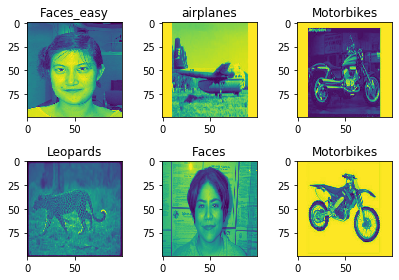

In [0]:
#plotting of Sample Images
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(train_s[i])
  plt.title(train_label[i])
  plt.tight_layout() 



In [0]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train_label_en=le.fit_transform(train_label)

In [0]:
#Standerdizing the data
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train=scalar.fit_transform(train)

In [0]:
x_train=x_train.reshape(-1,100,100,1)

In [0]:
# Model buliding
model=Sequential()
model.add(Conv2D(50,(3,3),padding='same',input_shape=(100,100,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(25,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(20,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(10,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2,)))

In [0]:
model.add(Flatten())
model.add(Dense(1000,activation='relu',))
model.add(Dropout(.2))
model.add(Dense(8,activation='softmax'))



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# MOdel Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 50)      500       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 50)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 25)        11275     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 25)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 20)        4520      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 10)       

In [0]:
#model compilation
model.compile(optimizer='adam',metrics=['accuracy'],loss='sparse_categorical_crossentropy')

In [0]:
model.fit(x_train,train_label_en,epochs=5)

Epoch 1/5
1671/1671 [==============================] - 26s 16ms/step - loss: 0.0841 - acc: 0.9737
Epoch 2/5
1671/1671 [==============================] - 26s 16ms/step - loss: 0.0687 - acc: 0.9808
Epoch 3/5
1671/1671 [==============================] - 26s 16ms/step - loss: 0.0448 - acc: 0.9838
Epoch 4/5
1671/1671 [==============================] - 26s 16ms/step - loss: 0.0540 - acc: 0.9862
Epoch 5/5
1671/1671 [==============================] - 26s 16ms/step - loss: 0.0362 - acc: 0.9910


In [0]:
x_test=data_test.drop('Labels',axis=1).values
y_test=data_test['Labels']

In [0]:
y=le.fit_transform(y_test)
scalar=StandardScaler()
x=scalar.fit_transform(x_test)

In [0]:
x_data=x.reshape(-1,100,100,1)

In [0]:
model.evaluate(x_data,y)

1118/1118 [==============================] - 5s 4ms/step


[0.23913579941635588, 0.9445438283713857]